# Linear Regression - Medical Insurance Costs

This project was made with the purpose of demonstrating multiple Linear Regression models, accuracy measures, and visualizations.

Made by: \
Diego Pintor Ochoa

dpintor1997@gmail.com


## Introduction

The dataset contains a diverse collection of Medical Insurance Beneficiaries, and the cost associated to having such insurance for each of the beneficiaries.
The purpose of this work, will be to attempt insurance costs predictions using the provided data, and several Linear Regression models, with its respective visualization, accuracy and other metrics to achieve a deeper understanding of such models.

## The Data

In [67]:
import pandas as pd 
import numpy as np

raw_data = pd.read_csv("Files\insurance.csv")
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
# Exploring the data
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can observe that the data contains 7 variables:
- Age: A numerical discrete variable that contains the age of the beneficiary.
- Sex: A categorical variable that contains the gender of the beneficiary.
- BMI: A continous numerical variable that contains the Body-Mass Index, a measure that can be used to describe the health related to the weight and size of the beneficiary.
- Children: A numerical discrete variable that enumerates the number of children the Beneficiary has (if the beneficiary has).
- Smoker: A categorical variable that indicates if the beneficiary smokes or not.
- Region: Categorical variable that contains the US region the beneficiary lives on.
- Charges: Numerical continous variable that tells us how much the insurance costs for each beneficiary.

There are 1338 observations of each variable.
As we are only interested in numerical variables to see if they can accurately predict the costs, we will be dropping Sex, Children, Smoker and Region variables.


In [69]:
# Checking for missing values
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [70]:
# Dropping non numerical, non continous variables
data = raw_data.drop(columns=["sex","children","smoker","region"])

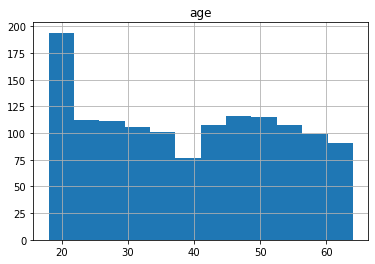

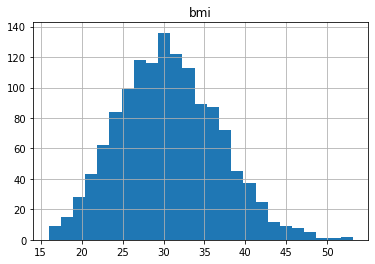

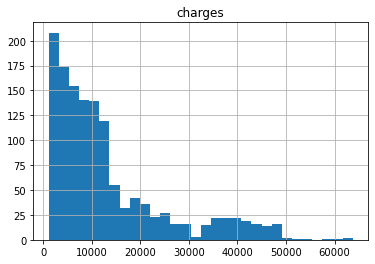

In [71]:
# Relevant variable visualization
import matplotlib.pyplot as plt
for var in data:
    plt.figure()
    data[var].hist(bins="auto")
    plt.title(var)

### Comparing the behaviour of each variable alongside with charges

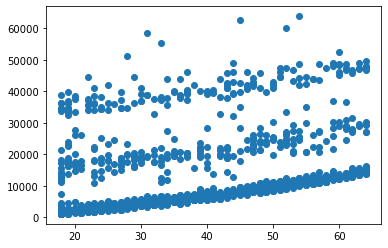

In [72]:
# Mulitple variable plot
plt.plot(data["age"],data["charges"],'o');

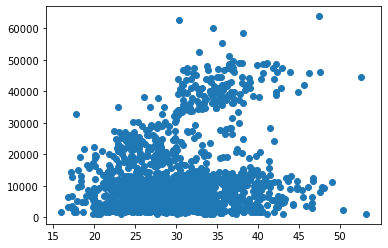

In [73]:
plt.plot(data["bmi"],data["charges"],'o');

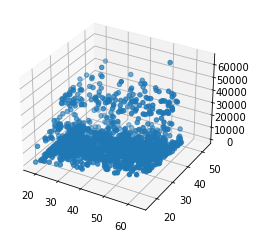

In [74]:
# 3d plot including both age and bmi
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["age"],data["bmi"],data["charges"],cmap="binary" , marker='o')


Unfortunately, whilst there is smoewhat of an upward behaviour of charges related to age, there is no evident correlation of the variables to the charges.

## The models
### Least Squares Model
The Least Squares Model consists on minimizing the residual sum of squares of the adjusted line. The residual sum of squares is the sum of each of the distances of each point to the line squared. This is done in order to avoid having to deal with negative numbers which added to the positive ones may cancel each other.

We define the residual sum of squares as it follows:
$$ RSS = \sum_{n=0}^{j} e_j^2$$

where:
$$e_j = y_j - \beta_0 - \beta_{x_j}$$

for each variable $x_n$.

When $n = 1$ were refering to a simple line on a 2d plane, $n=2$ a plane on a 3d space, and $n>=3$ a hyperplane on a higher level of dimensions.

The least squares minimizing can be found with the following equation:
$$ \hat{\beta_n} = \frac{\sum_{i=j}^{n}(x_i-\overline{x})(y_i-\overline{y})}{\sum_{=1}^{n}(x_i-\overline{x})^2} $$


### Gradient Descent Optimization

The basic principle of the linear regression stays the same: minimize the residual sum of squares of the adjusted line (or hyperplane), in this case, it is optimized using the descent of the Gradient, in which, for each iteration of the gradient calculation, the gradient itself is optimized at a rate of:

$$\theta_j = \theta_j - \nu \frac{\delta}{\delta \theta_j}RSS$$

where $\nu$ is the "learning rate", or the size of the step when advancing or returning on the gradient.

### Sklearn Ridge Model

In this model, the least squares uses l2 regularization, in which the objective function:
$$||y - Xw||^2_2 + \alpha * ||w||^2_2 $$ 
is minimized.



## Model Implementation

Model for variable:  age
Intercept:  3876.928684191693
Slope:  [240.59655979]
R^2:  0.12408973539501944
Model for variable:  bmi
Intercept:  1353.073072204661
Slope:  [392.43654417]
R^2:  0.03970193117941878


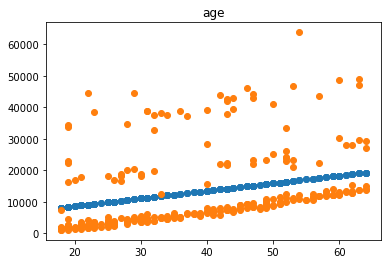

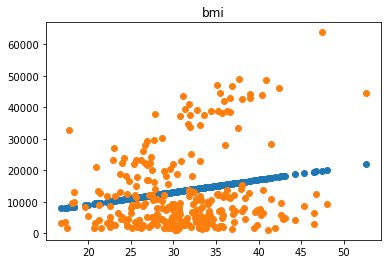

In [75]:
# Linear regression model, least squares, cycling for each variable, plotting the results and saving the model for later use
from sklearn.linear_model import LinearRegression
R2_models = []
for var in data.drop(columns=["charges"]):
    X_train, X_test, y_train, y_test = train_test_split(data[var], data["charges"], test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train.values.reshape(-1,1),y_train)
    plt.figure()
    plt.plot(X_test,model.predict(X_test.values.reshape(-1,1)),'o')
    plt.plot(X_test,y_test,'o')
    plt.title(var)
    # Print the parameters for each model
    print("Model for variable: ",var)
    print("Intercept: ",model.intercept_ )
    print("Slope: ",model.coef_ )
    # Print the R^2 for each model
    print("R^2: ",model.score(X_test.values.reshape(-1,1),y_test))
    R2_models.append(model.score(X_test.values.reshape(-1,1),y_test))

Model for variable:  age
Intercept:  [9524.3639557]
Slope:  [184.67541268]
R^2:  0.020846738158449174
Model for variable:  bmi
Intercept:  [-33309.98547334]
Slope:  [1479.74163581]
R^2:  -0.2534162328746128


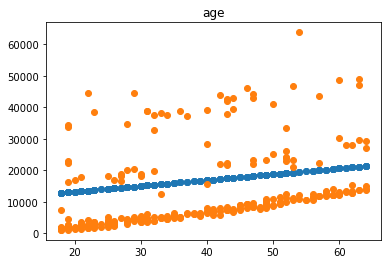

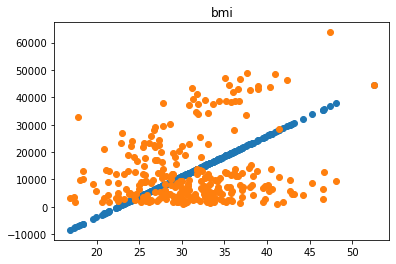

In [76]:
# Linear regression model, stochastic gradient descent, cycling for each variable, plotting the results and saving the model for later use
from sklearn.linear_model import SGDRegressor
for var in data.drop(columns=["charges"]):
    X_train, X_test, y_train, y_test = train_test_split(data[var], data["charges"], test_size=0.2, random_state=42)
    model = SGDRegressor()
    model.fit(X_train.values.reshape(-1,1),y_train)
    plt.figure()
    plt.plot(X_test,model.predict(X_test.values.reshape(-1,1)),'o')
    plt.plot(X_test,y_test,'o')
    plt.title(var)
    print("Model for variable: ",var)
    print("Intercept: ",model.intercept_ )
    print("Slope: ",model.coef_ )  
    print("R^2: ",model.score(X_test.values.reshape(-1,1),y_test))
    R2_models.append(model.score(X_test.values.reshape(-1,1),y_test))

Model for variable:  age
Intercept:  3876.9734039155937
Slope:  [240.59542353]
R^2:  0.12408948808108544
Model for variable:  bmi
Intercept:  1353.3802423386496
Slope:  [392.42649292]
R^2:  0.039701904375100794


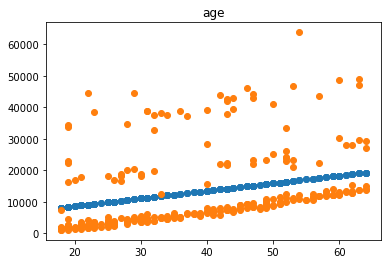

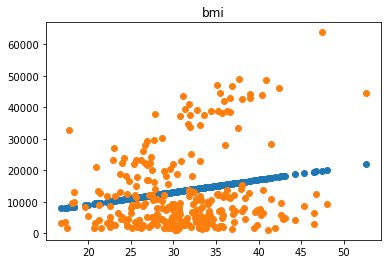

In [77]:
# Linear regression model, sklearn ridge, cycling for each variable, plotting the results and saving the model for later use
from sklearn.linear_model import Ridge
for var in data.drop(columns=["charges"]):
    X_train, X_test, y_train, y_test = train_test_split(data[var], data["charges"], test_size=0.2, random_state=42)
    model = Ridge()
    model.fit(X_train.values.reshape(-1,1),y_train)
    plt.figure()
    plt.plot(X_test,model.predict(X_test.values.reshape(-1,1)),'o')
    plt.plot(X_test,y_test,'o')
    plt.title(var)
    print("Model for variable: ",var)
    print("Intercept: ",model.intercept_ )
    print("Slope: ",model.coef_ )
    print("R^2: ",model.score(X_test.values.reshape(-1,1),y_test))
    R2_models.append(model.score(X_test.values.reshape(-1,1),y_test))

In [78]:
# Now for the multiple variable model
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["charges"]), data["charges"], test_size=0.2, random_state=42)
# Linear regression model, least squares
linear_multi = LinearRegression()
linear_multi.fit(X_train,y_train)
print("Intercept: ",linear_multi.intercept_ )
print("Slope: ",linear_multi.coef_ )
print("R^2: ",linear_multi.score(X_test,y_test))
R2_models.append(linear_multi.score(X_test,y_test))
# Stochastic gradient descent
sgd_multi = SGDRegressor()
sgd_multi.fit(X_train,y_train)
print("Intercept: ",sgd_multi.intercept_ )
print("Slope: ",sgd_multi.coef_ )
print("R^2: ",sgd_multi.score(X_test,y_test))
R2_models.append(sgd_multi.score(X_test,y_test))
# Ridge
ridge_multi = Ridge()
ridge_multi.fit(X_train,y_train)
print("Intercept: ",ridge_multi.intercept_ )
print("Slope: ",ridge_multi.coef_ )
print("R^2: ",ridge_multi.score(X_test,y_test))
R2_models.append(ridge_multi.score(X_test,y_test))



Intercept:  -5571.083408548648
Slope:  [223.79653146 330.79448868]
R^2:  0.1533569292467798
Intercept:  [6.61950283e+09]
Slope:  [-6.41949298e+07 -2.08975305e+08]
R^2:  -53151487835.95881
Intercept:  -5570.804824421202
Slope:  [223.79589594 330.78619128]
R^2:  0.15335665232641704


In [79]:
# Create a dataframe with the R^2 values for each model
R2_df = pd.DataFrame(R2_models,columns=["R^2"],index=["age","bmi","age_sgd","bmi_sgd","age_ridge","bmi_ridge","multi_linear","multi_sgd","multi_ridge"])


[0.12408973539501944,
 0.03970193117941878,
 0.020846738158449174,
 -0.2534162328746128,
 0.12408948808108544,
 0.039701904375100794,
 0.1533569292467798,
 -53151487835.95881,
 0.15335665232641704]

In [87]:
# Plot the R^2 values for each model
pd.set_option('display.float_format', lambda x: '%.5f' % x)
R2_df.sort_values(by="R^2",ascending=False)


,R^2
multi_linear,0.15336
multi_ridge,0.15336
age,0.12409
age_ridge,0.12409
bmi,0.03970
bmi_ridge,0.03970
age_sgd,0.02085
bmi_sgd,-0.25342
multi_sgd,-53151487835.95881


## Results

It is well known that, for a given Linear Regression model, the threshold for an "acceptable model" to be used on prediction is to obtain a $R^2$ score larger than 0.5. Also, it is worth noting that although the maximum $R^2$ score is 1, there is no threshold below, as it can be observed in the multiple variable Stochastic Gradient Descent model (what a terrible model!).

In this project, the maximum accuracy that can be obtained when attempting prediction using only the numeric variables and Linear Regression with these models is 15.336%. This is obtained with both variables, and for both the Least squares and ridge linear regression models.

The results using only Linear Regression associated models, at least for this dataset, are dissapointing, and should not be used for estimating how much the insurance costs are going to be based only on age and BMI. Further models should be implemented to obtain a better prediction.

## References
Dataset:

Miri Choi. (2017). Medical Cost Personal Datasets, Retrieved September 2022 from https://www.kaggle.com/datasets/mirichoi0218/insurance.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

Statistical Learning, Vega Fernandez, Juan Antonio, September '22, ITESO